# Exploratory Data Analysis (EDA)

This notebook explores patterns and relationships in the data to identify factors associated with academic risk.
The insights from this analysis guide feature selection and model choice.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
data_path="C:/Users/prasad/OneDrive/Documents/student-performance-risk-prediction/data/raw/student-mat.csv"
df=pd.read_csv(data_path,sep=';')

In [4]:
def assign_risk(grade):
    if grade<10:
        return "High"
    elif grade<15:
        return "Medium"
    else :
        return "Low"
df["risk_level"]=df["G3"].apply(assign_risk)

In [5]:
df = df.drop(columns=["G1", "G2", "G3"])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,risk_level
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,High
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,High
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,Medium
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,Medium


In [6]:
df["risk_level"].value_counts()

risk_level
Medium    192
High      130
Low        73
Name: count, dtype: int64

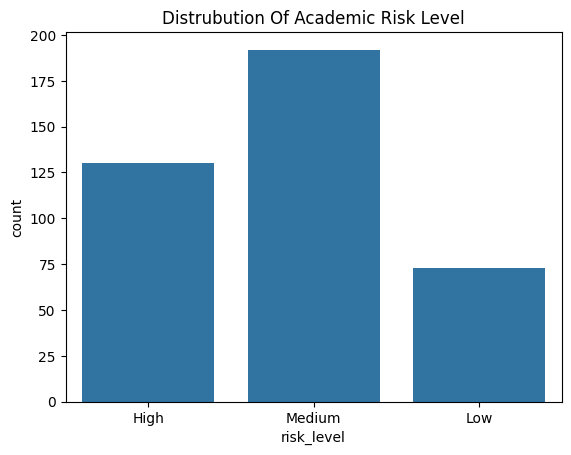

In [9]:
sns.countplot(x="risk_level",data=df)
plt.title("Distrubution Of Academic Risk Level")
plt.show()


### Target Distribution

The dataset shows an imbalanced distribution of academic risk levels.
This imbalance will be considered during model evaluation.


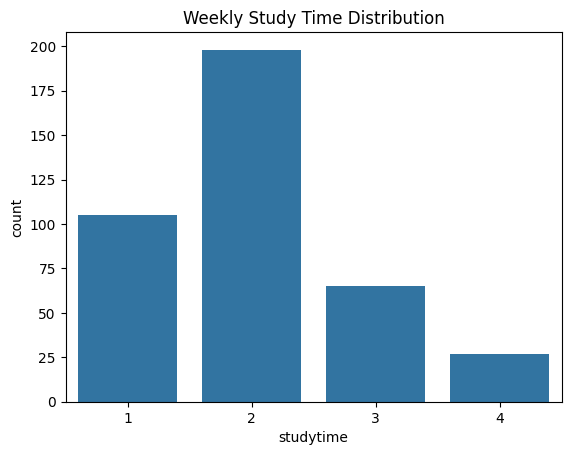

In [10]:
sns.countplot(x="studytime", data=df)
plt.title("Weekly Study Time Distribution")
plt.show()


### Study Time

Most students fall into lower study-time categories, suggesting limited weekly study hours.


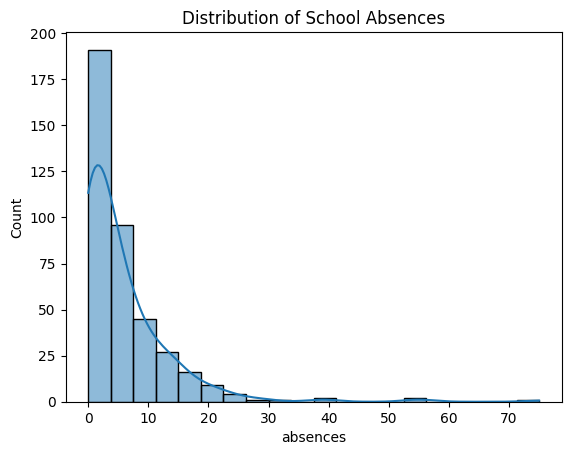

In [11]:
sns.histplot(df["absences"], bins=20, kde=True)
plt.title("Distribution of School Absences")
plt.show()


### Absences

Absences are right-skewed, with most students having low absences and a few extreme cases.


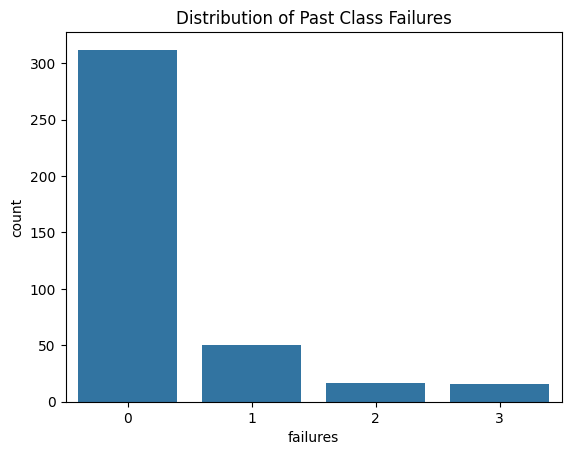

In [12]:
sns.countplot(x="failures", data=df)
plt.title("Distribution of Past Class Failures")
plt.show()


### Past Failures

While most students have no past failures, those with multiple failures represent a high-risk subgroup.


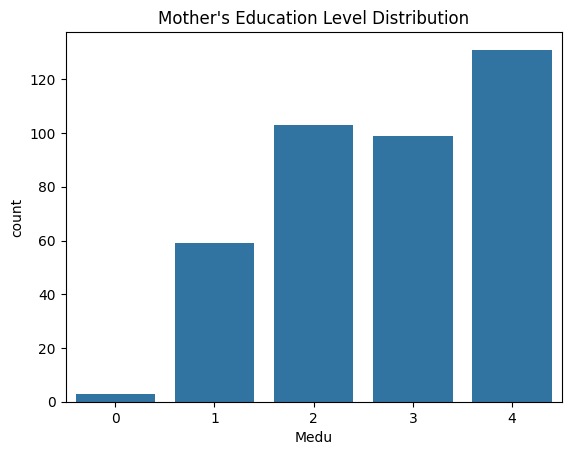

In [13]:
sns.countplot(x="Medu", data=df)
plt.title("Mother's Education Level Distribution")
plt.show()


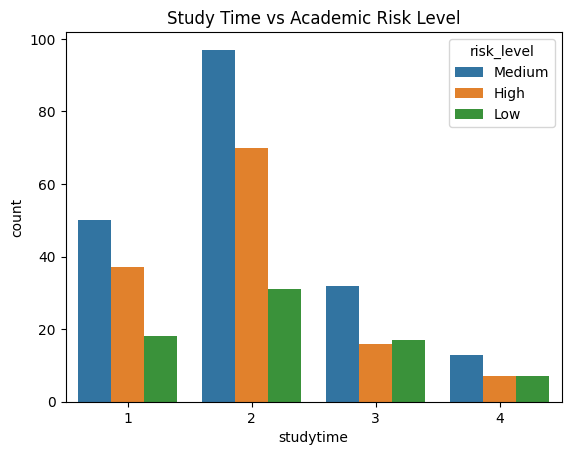

In [14]:
sns.countplot(x="studytime", hue="risk_level", data=df)
plt.title("Study Time vs Academic Risk Level")
plt.show()


### Study Time vs Academic Risk

Lower study time is associated with higher academic risk, indicating study habits as a key factor.


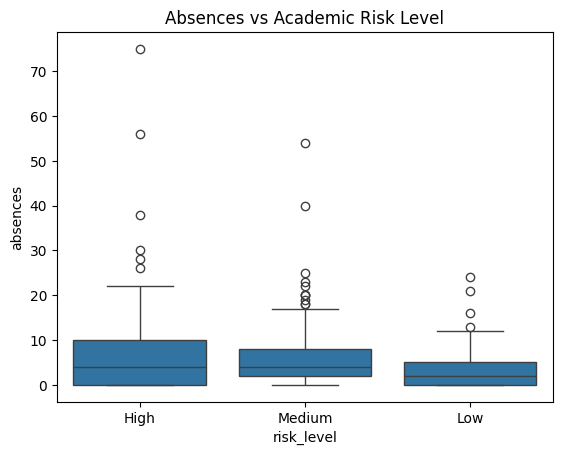

In [15]:
sns.boxplot(x="risk_level", y="absences", data=df)
plt.title("Absences vs Academic Risk Level")
plt.show()


### Absences vs Academic Risk

Students in higher risk categories tend to have higher school absences.


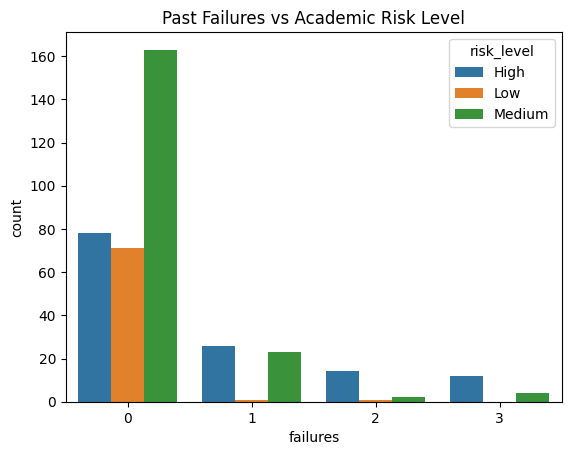

In [16]:
sns.countplot(x="failures", hue="risk_level", data=df)
plt.title("Past Failures vs Academic Risk Level")
plt.show()


### Past Failures vs Academic Risk

Past academic failures show a strong association with higher academic risk.


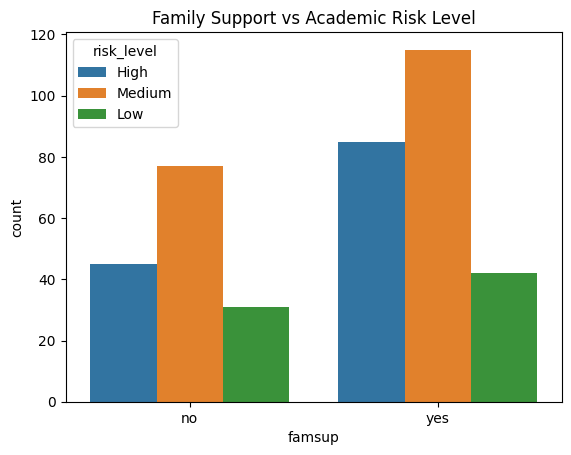

In [17]:
sns.countplot(x="famsup", hue="risk_level", data=df)
plt.title("Family Support vs Academic Risk Level")
plt.show()


### Family Support

Students with family educational support are more likely to fall into lower risk categories.


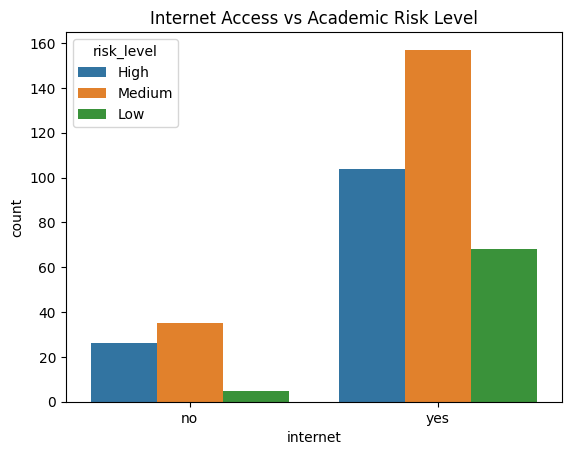

In [18]:
sns.countplot(x="internet", hue="risk_level", data=df)
plt.title("Internet Access vs Academic Risk Level")
plt.show()


In [20]:
numeric_df=df.select_dtypes(include="int64")
numeric_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4


In [21]:
corr_matrix=numeric_df.corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


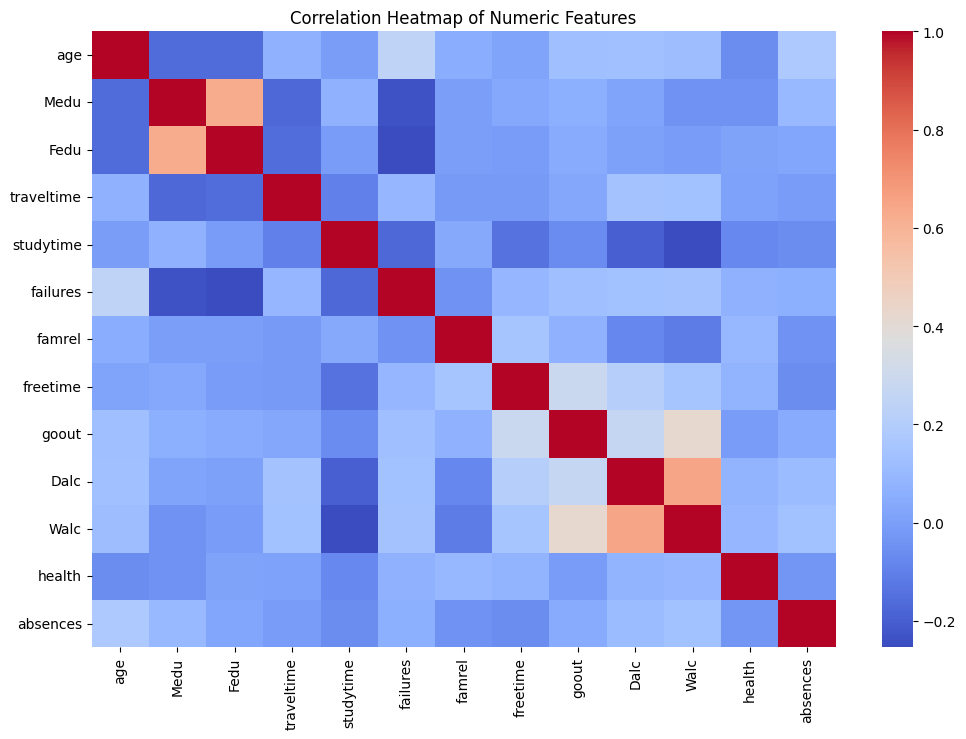

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Correlation Insights

- No severe multicollinearity observed among numeric features.
- Parent education levels show moderate correlation, which is expected.
- Study time and past failures show meaningful relationships with academic risk.


## EDA Summary

- Academic history and behavioral features show strong association with academic risk.
- Demographic features appear less influential.
- EDA findings support the use of interpretable models such as Decision Trees.
